# Link Scribe

In [74]:
!pip3 install imbalanced-learn
!pip3 install nltk

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
from nltk.corpus import stopwords
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import pickle

In [10]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
website_df= pd.read_csv('website_classification.csv')
website_df

,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel
...,...,...,...,...
1403,1403,http://www.oldwomen.org/,old nude women porn mature granny sex horny ol...,Adult
1404,1404,http://www.webcamslave.com,bdsm cams bdsm chat bondage cams free bdsm vid...,Adult
1405,1405,http://www.buyeuroporn.com/,porno dvd online european porn dvd cheap adult...,Adult
1406,1406,http://www.analdreamhouse.com/30/03/agecheck/i...,anal dream house anal dream house anal dream h...,Adult


In [4]:
print('Shape of dataframe:',website_df.shape)
print('Columns in dataframe:',website_df.columns)

Shape of dataframe: (1408, 4)
Columns in dataframe: Index(['Unnamed: 0', 'website_url', 'cleaned_website_text', 'Category'], dtype='object')


In [5]:
website_df.drop('Unnamed: 0',axis=1,inplace=True)   #Dropping the unnecessary column
website_df.head()

,website_url,cleaned_website_text,Category
0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


In [6]:
website_df.isnull().sum()

website_url             0
cleaned_website_text    0
Category                0
dtype: int64

In [7]:
df_a=website_df.groupby('Category').count().sort_values(by='Category',ascending=True)
df_a.index

Index(['Adult', 'Business/Corporate', 'Computers and Technology', 'E-Commerce',
       'Education', 'Food', 'Forums', 'Games', 'Health and Fitness',
       'Law and Government', 'News', 'Photography',
       'Social Networking and Messaging', 'Sports', 'Streaming Services',
       'Travel'],
      dtype='object', name='Category')

In [8]:
df_a

,website_url,cleaned_website_text
Category,,
Adult,16,16
Business/Corporate,109,109
Computers and Technology,93,93
E-Commerce,102,102
Education,114,114
Food,92,92
Forums,16,16
Games,98,98
Health and Fitness,96,96


<Axes: xlabel='count', ylabel='Category'>

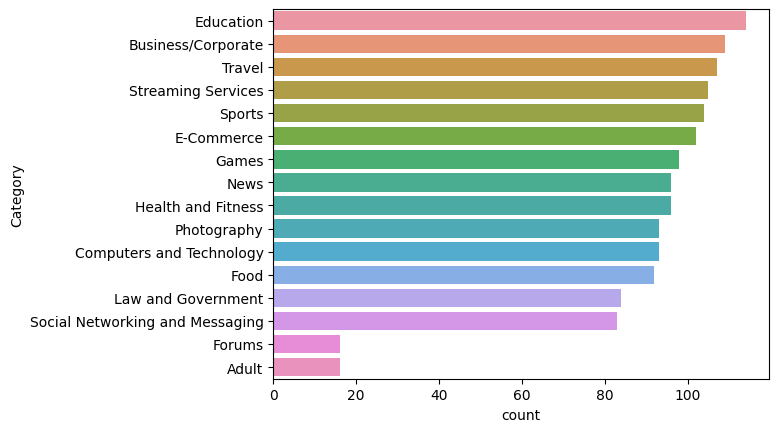

In [9]:
sns.countplot(y=website_df['Category'],order=website_df['Category'].value_counts().index[:16])

In [21]:
#Education
sum_ed=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Education'):
        a= len(website_df['cleaned_website_text'][i])
        sum_ed=sum_ed+a
print('Total number of words including all the educational websites: ', sum_ed)



#Business/Corporate
sum_business=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Business/Corporate'):
        a= len(website_df['cleaned_website_text'][i])
        sum_business=sum_business+a
print('Total number of words including all the Business/Corporate website: ', sum_business)


#Travel
sum_travel=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Travel'):
        a= len(website_df['cleaned_website_text'][i])
        sum_travel=sum_travel+a
print('Total number of words including all the travel websites: ', sum_travel)


#Streaming services
sum_stream=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Streaming Services'):
        a= len(website_df['cleaned_website_text'][i])
        sum_stream=sum_stream+a
print('Total number of words including all the Streaming services websites: ', sum_stream)


#Sports
sum_sports=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Sports'):
        a= len(website_df['cleaned_website_text'][i])
        sum_sports=sum_sports+a
print('Total number of words including all the sports websites: ', sum_sports)


#E-commerce
sum_commerce=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='E-Commerce'):
        a= len(website_df['cleaned_website_text'][i])
        sum_commerce=sum_commerce+a
print('Total number of words including all the E-commerce website: ', sum_commerce)



#Games
sum_game=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Games'):
        a= len(website_df['cleaned_website_text'][i])
        sum_game=sum_game+a
print('Total number of words including all the games websites: ', sum_game)



#News
sum_news=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='News'):
        a= len(website_df['cleaned_website_text'][i])
        sum_news=sum_news+a
print('Total number of words including all the News websites: ', sum_news)



#Health and Fitness
sum_health=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Health and Fitness'):
        a= len(website_df['cleaned_website_text'][i])
        sum_health=sum_health+a
print('Total number of words including all the Health and Fitness websites: ', sum_health)



#Computers and Technology
sum_comp=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Computers and Technology'):
        a= len(website_df['cleaned_website_text'][i])
        sum_comp=sum_comp+a
print('Total number of words including all the Computers and Technology website: ', sum_comp)



#Photography
sum_photog=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Photography'):
        a= len(website_df['cleaned_website_text'][i])
        sum_photog=sum_photog+a
print('Total number of words including all the Photography websites: ', sum_photog)



#Food
sum_food=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Food'):
        a= len(website_df['cleaned_website_text'][i])
        sum_food=sum_food+a
print('Total number of words including all the Food websites: ', sum_food)



#Law and Government
sum_law=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Law and Government'):
        a= len(website_df['cleaned_website_text'][i])
        sum_law=sum_law+a
print('Total number of words including all the Law and Government websites: ', sum_law)



#Social Networking and Messaging
sum_social=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Social Networking and Messaging'):
        a= len(website_df['cleaned_website_text'][i])
        sum_social=sum_social+a
print('Total number of words including all the Social Networking and Messaging website: ', sum_social)



#Adult
sum_ad=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Adult'):
        a= len(website_df['cleaned_website_text'][i])
        sum_ad=sum_ad+a
print('Total number of words including all the adult websites: ', sum_ad)



#Forums
sum_forum=0
for i in website_df['Category'].index:
    if (website_df['Category'][i]=='Forums'):
        a= len(website_df['cleaned_website_text'][i])
        sum_forum=sum_forum+a
print('Total number of words including all the Forums websites: ', sum_forum)


l=[sum_ed,sum_forum,sum_news,sum_sports,sum_health,sum_comp,sum_ad,sum_photog,sum_social,sum_law,sum_food,sum_game,sum_stream,sum_travel,sum_business,sum_commerce]
x1=pd.Series(l).to_frame()
x2=pd.Series(['Education','Business/Corporate','Travel','Streaming Services','Sports','E-Commerce','Games','News','Health & Fitness','Computer and Technology','Photography','Food','Law & Government','Social Neworking & Messaging','Adult','Forums']).to_frame()
x3=pd.concat([x2,x1],axis=1,ignore_index=True)
x3.columns=['Website category','Sum of length of all the words on the site']
x3.sort_values(by='Sum of length of all the words on the site',ascending=False)

Total number of words including all the educational websites:  774075
Total number of words including all the Business/Corporate website:  387336
Total number of words including all the travel websites:  615047
Total number of words including all the Streaming services websites:  385775
Total number of words including all the sports websites:  854152
Total number of words including all the E-commerce website:  480333
Total number of words including all the games websites:  299445
Total number of words including all the News websites:  1020091
Total number of words including all the Health and Fitness websites:  534152
Total number of words including all the Computers and Technology website:  409889
Total number of words including all the Photography websites:  401760
Total number of words including all the Food websites:  437253
Total number of words including all the Law and Government websites:  443235
Total number of words including all the Social Networking and Messaging website:  

,Website category,Sum of length of all the words on the site
2,Travel,1020091
3,Streaming Services,854152
0,Education,774075
13,Social Neworking & Messaging,615047
4,Sports,534152
15,Forums,480333
9,Computer and Technology,443235
10,Photography,437253
5,E-Commerce,409889
7,News,401760


Text(0.5, 1.0, 'Category wise total number of characters on all the websites (combined)')

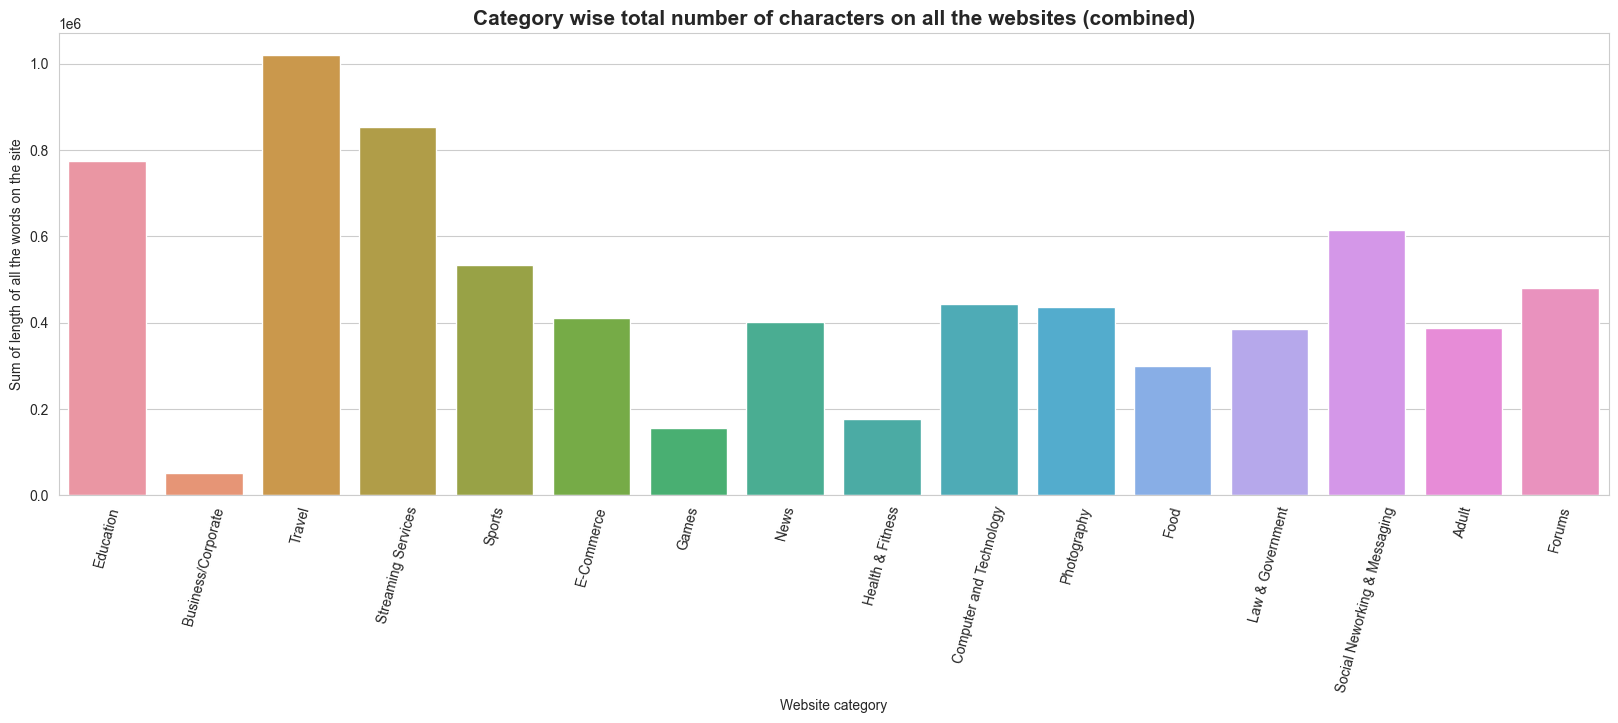

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,6))
sns.barplot(x='Website category',y='Sum of length of all the words on the site',data=x3)
plt.xticks(rotation=75)
plt.title('Category wise total number of characters on all the websites (combined)',fontweight='bold',fontsize=15)

In [29]:
X=website_df['cleaned_website_text']      
y=website_df['Category']   

In [30]:
def text_process(value):
    nopunc=[char for char in value if char not in string.punctuation]   #Removes punctuation
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]  #Removes stopwords


In [31]:
X.apply(text_process).head() 

0    [official, site, good, hotel, accommodation, b...
1    [expedia, hotel, book, sites, like, use, vacat...
2    [tripadvisor, hotel, book, sites, like, previo...
3    [cheap, flights, search, compare, flights, mom...
4    [bot, create, free, account, create, free, acc...
Name: cleaned_website_text, dtype: object

In [73]:
print(X.shape)

(1408,)


In [32]:
from sklearn.feature_extraction.text import CountVectorizer 
X1=CountVectorizer().fit_transform(X)
print(X1)

  (0, 37739)	1
  (0, 48869)	4
  (0, 21803)	3
  (0, 24480)	8
  (0, 1050)	4
  (0, 6314)	1
  (0, 46768)	2
  (0, 14366)	9
  (0, 58713)	1
  (0, 7850)	2
  (0, 44989)	10
  (0, 19223)	5
  (0, 22419)	1
  (0, 41999)	1
  (0, 7965)	2
  (0, 31003)	1
  (0, 24485)	4
  (0, 49875)	2
  (0, 37727)	3
  (0, 38798)	1
  (0, 57934)	1
  (0, 7566)	2
  (0, 10558)	2
  (0, 13690)	9
  (0, 9879)	1
  :	:
  (1407, 51895)	1
  (1407, 54389)	1
  (1407, 28825)	1
  (1407, 39920)	1
  (1407, 8015)	1
  (1407, 46858)	1
  (1407, 49553)	1
  (1407, 50059)	2
  (1407, 36845)	1
  (1407, 21403)	1
  (1407, 52235)	1
  (1407, 55807)	1
  (1407, 30196)	1
  (1407, 33269)	1
  (1407, 10951)	1
  (1407, 10782)	1
  (1407, 38558)	1
  (1407, 27406)	1
  (1407, 31247)	1
  (1407, 53768)	1
  (1407, 30438)	1
  (1407, 17665)	1
  (1407, 27665)	1
  (1407, 4620)	1
  (1407, 51547)	1


In [33]:
from sklearn.feature_extraction.text import TfidfTransformer    
X2=TfidfTransformer().fit_transform(X1)     
print(X2)

  (0, 60024)	0.024502342045692745
  (0, 60009)	0.03163419860320906
  (0, 60005)	0.027810131989300536
  (0, 59996)	0.022764887896070028
  (0, 59958)	0.03163419860320906
  (0, 59851)	0.024502342045692745
  (0, 59839)	0.02852814589910457
  (0, 59819)	0.02815630633841439
  (0, 59795)	0.023417434399081647
  (0, 59756)	0.028929763220329377
  (0, 59744)	0.028929763220329377
  (0, 59727)	0.02815630633841439
  (0, 59714)	0.032407655485124046
  (0, 58841)	0.03791998430637177
  (0, 58836)	0.03791998430637177
  (0, 58713)	0.017678028913267318
  (0, 58699)	0.00949716188945847
  (0, 58666)	0.03866066255083005
  (0, 58649)	0.016711685694573625
  (0, 58437)	0.034921571096896184
  (0, 58303)	0.022764887896070028
  (0, 57934)	0.01953792481306217
  (0, 57795)	0.011090669491753805
  (0, 57645)	0.07583996861274354
  (0, 57611)	0.033782315438822055
  :	:
  (1407, 3696)	0.015369659053057037
  (1407, 3690)	0.010018190161557876
  (1407, 3448)	0.01151304242233949
  (1407, 3315)	0.023930781021979573
  (1407, 331

In [43]:
print(X1.shape)
print(X2.shape)

(1408, 60031)
(1408, 60031)


#  Naive Bayes classifier

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3,random_state=101)

In [47]:
#### applying the algorithm
from sklearn.naive_bayes import MultinomialNB
model_clf= MultinomialNB()
model_clf.fit(X_train,y_train)

MultinomialNB()

In [51]:
predictions=model_clf.predict(X_test)

In [52]:
print(predictions)

['Food' 'Business/Corporate' 'News' 'Travel' 'Health and Fitness'
 'Streaming Services' 'Social Networking and Messaging' 'E-Commerce'
 'News' 'Education' 'E-Commerce' 'Business/Corporate' 'Education'
 'Social Networking and Messaging' 'Business/Corporate' 'News'
 'E-Commerce' 'Streaming Services' 'Food' 'Health and Fitness' 'Education'
 'Photography' 'Food' 'Sports' 'Travel' 'Business/Corporate' 'Sports'
 'News' 'E-Commerce' 'Photography' 'E-Commerce' 'Law and Government'
 'Travel' 'Travel' 'Streaming Services' 'Health and Fitness' 'Sports'
 'Education' 'Travel' 'Health and Fitness' 'Business/Corporate'
 'Education' 'Photography' 'E-Commerce' 'Business/Corporate'
 'Computers and Technology' 'Streaming Services' 'Business/Corporate'
 'Education' 'News' 'Games' 'Games' 'E-Commerce' 'Travel' 'Travel'
 'Streaming Services' 'Social Networking and Messaging'
 'Business/Corporate' 'Health and Fitness' 'Business/Corporate' 'News'
 'Travel' 'Streaming Services' 'Streaming Services' 'Streaming 

In [53]:
print(classification_report(predictions,y_test))

                                 precision    recall  f1-score   support

                          Adult       0.00      0.00      0.00         0
             Business/Corporate       0.97      0.67      0.79        43
       Computers and Technology       0.64      0.84      0.73        19
                     E-Commerce       0.89      0.89      0.89        28
                      Education       0.97      0.88      0.93        43
                           Food       0.95      1.00      0.98        21
                         Forums       0.00      0.00      0.00         0
                          Games       0.87      1.00      0.93        27
             Health and Fitness       0.91      1.00      0.95        31
             Law and Government       0.73      1.00      0.85        22
                           News       0.93      0.64      0.76        44
                    Photography       0.91      0.80      0.85        25
Social Networking and Messaging       0.81      1.

/Users/sebastianandersonguerrero/proyecto_final_Full_Stack/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sebastianandersonguerrero/proyecto_final_Full_Stack/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sebastianandersonguerrero/proyecto_final_Full_Stack/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control th

<Axes: >

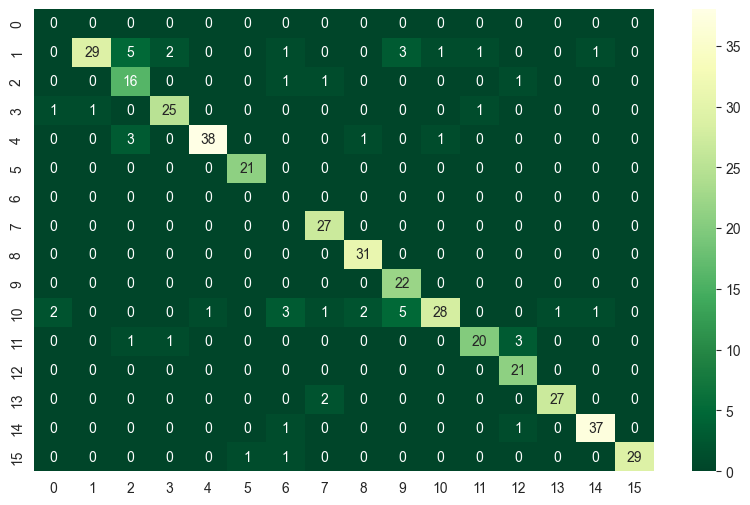

In [54]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(predictions,y_test),cmap='YlGn_r',annot=True)

In [55]:
print(accuracy_score(predictions,y_test))

0.8770685579196218


# Support Vector Machines

In [58]:
from sklearn.svm import SVC
model_svc= SVC()
model_svc.fit(X_train,y_train)

SVC()

In [59]:
predictions_svc=model_svc.predict(X_test)

In [60]:
predictions_svc

array(['Food', 'Business/Corporate', 'News', 'Travel',
       'Health and Fitness', 'Business/Corporate',
       'Social Networking and Messaging', 'E-Commerce', 'News',
       'Education', 'E-Commerce', 'Business/Corporate', 'Education',
       'Social Networking and Messaging', 'Business/Corporate', 'News',
       'E-Commerce', 'Streaming Services', 'Business/Corporate',
       'Health and Fitness', 'Education', 'Photography',
       'Business/Corporate', 'Sports', 'Travel', 'Business/Corporate',
       'Games', 'News', 'E-Commerce', 'Photography', 'E-Commerce',
       'Law and Government', 'Travel', 'Travel', 'Streaming Services',
       'Business/Corporate', 'Sports', 'Education', 'Travel',
       'Health and Fitness', 'Business/Corporate', 'Education',
       'Photography', 'E-Commerce', 'Computers and Technology',
       'Computers and Technology', 'Streaming Services',
       'Business/Corporate', 'Education', 'News', 'Games', 'Games',
       'Business/Corporate', 'Travel', 'Tra

In [61]:
print(classification_report(predictions_svc,y_test))

                                 precision    recall  f1-score   support

                          Adult       0.33      1.00      0.50         1
             Business/Corporate       0.97      0.37      0.54        78
       Computers and Technology       0.84      0.88      0.86        24
                     E-Commerce       0.89      0.93      0.91        27
                      Education       0.95      0.93      0.94        40
                           Food       0.73      1.00      0.84        16
                         Forums       0.00      0.00      0.00         0
                          Games       0.97      1.00      0.98        30
             Health and Fitness       0.82      1.00      0.90        28
             Law and Government       0.87      1.00      0.93        26
                           News       0.87      0.93      0.90        28
                    Photography       0.77      0.94      0.85        18
Social Networking and Messaging       0.73      1.

/Users/sebastianandersonguerrero/proyecto_final_Full_Stack/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sebastianandersonguerrero/proyecto_final_Full_Stack/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sebastianandersonguerrero/proyecto_final_Full_Stack/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control th

<Axes: >

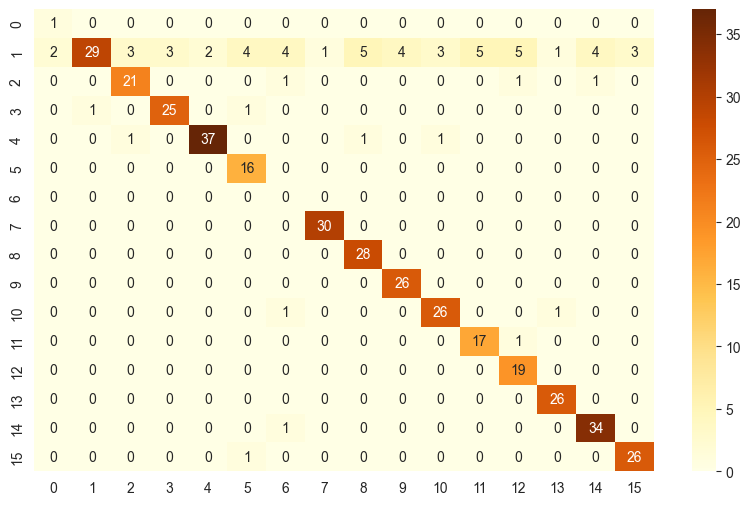

In [63]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(predictions_svc,y_test),cmap='YlOrBr',annot=True)

In [64]:
print(accuracy_score(predictions_svc,y_test))

0.8534278959810875


# Tensorflow

In [65]:
from sklearn.ensemble import RandomForestClassifier
model_rfc=RandomForestClassifier()
model_rfc.fit(X_train,y_train)

RandomForestClassifier()

In [66]:
predictions_rfc=model_rfc.predict(X_test)

In [67]:
predictions_rfc

array(['Food', 'Education', 'News', 'Travel', 'Health and Fitness',
       'Computers and Technology', 'Social Networking and Messaging',
       'E-Commerce', 'News', 'Education', 'E-Commerce',
       'Business/Corporate', 'Streaming Services',
       'Social Networking and Messaging', 'Business/Corporate', 'News',
       'E-Commerce', 'Streaming Services', 'Food', 'Health and Fitness',
       'Education', 'Photography', 'Food', 'Sports', 'Travel',
       'Business/Corporate', 'Business/Corporate', 'News', 'E-Commerce',
       'Photography', 'E-Commerce', 'Law and Government', 'Travel',
       'Travel', 'Streaming Services', 'Health and Fitness', 'Sports',
       'Education', 'Travel', 'Health and Fitness', 'Law and Government',
       'Education', 'Photography', 'E-Commerce',
       'Computers and Technology', 'Computers and Technology',
       'Streaming Services', 'Social Networking and Messaging',
       'Education', 'News', 'Streaming Services', 'Games',
       'Streaming Services

In [68]:
print(classification_report(predictions_rfc,y_test))

                                 precision    recall  f1-score   support

                          Adult       0.33      1.00      0.50         1
             Business/Corporate       0.83      0.76      0.79        33
       Computers and Technology       0.76      0.79      0.78        24
                     E-Commerce       0.96      0.93      0.95        29
                      Education       0.92      0.77      0.84        47
                           Food       0.91      0.87      0.89        23
                         Forums       0.00      0.00      0.00         0
                          Games       0.71      0.96      0.81        23
             Health and Fitness       0.76      0.96      0.85        27
             Law and Government       0.87      0.93      0.90        28
                           News       0.87      0.90      0.88        29
                    Photography       0.91      0.87      0.89        23
Social Networking and Messaging       0.81      0.

/Users/sebastianandersonguerrero/proyecto_final_Full_Stack/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sebastianandersonguerrero/proyecto_final_Full_Stack/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sebastianandersonguerrero/proyecto_final_Full_Stack/env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control th

<Axes: >

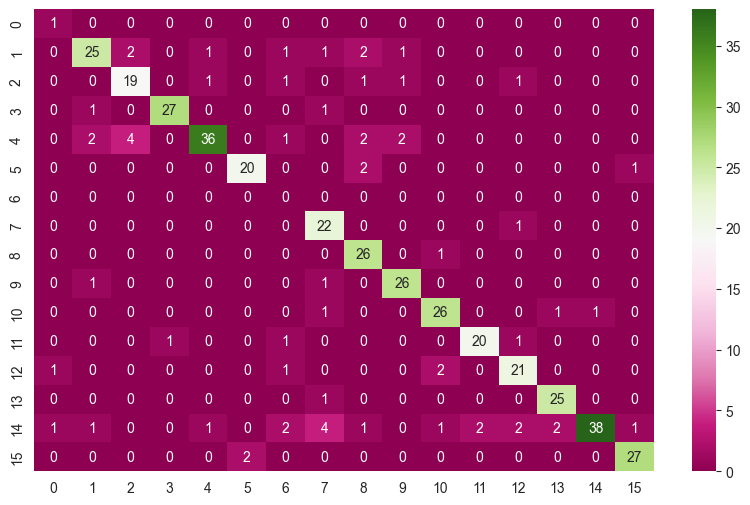

In [69]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(predictions_rfc,y_test),cmap='PiYG',annot=True)

In [70]:
print(accuracy_score(predictions_rfc,y_test))

0.8486997635933806


In [71]:
pickle.dump(model_rfc, open('models/rfc/rfc.sav', 'wb'))
pickle.dump(model_clf, open('models/clf/model_clf_1.sav', 'wb'))
pickle.dump(model_svc, open('models/svc/svc_clf_1.sav', 'wb'))

# Web Scraping

In [75]:
!pip3 install beautifulsoup4
!pip3 install lxml

In [76]:
import requests
import pandas as pd
import string
import re
from bs4 import BeautifulSoup
import lxml

In [77]:
headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
    }
def get_title(html):
    """Scrape page title."""
    if html.find("title"):
        title = html.find("title").string
    elif html.find("meta", property="og:title"):
        title = html.find("meta", property="og:title").get('content').string
    elif html.find("h1"):
        title = html.find("h1").string
    return title


def get_description(html):
    """Scrape page description."""
    if html.find("meta", property="description"):
        description = html.find("meta", property="description").get('content')
    elif html.find("meta", property="og:description"):
        description = html.find("meta", property="og:description").get('content')
    elif html.find("p"):
        description = html.find("p").contents
    return description


def get_image(html):
    """Scrape share image."""
    if html.find("meta", property="image"):
        image = html.find("meta", property="image").get('content')
    elif html.find("meta", property="og:image"):
        image = html.find("meta", property="og:image").get('content')
    elif html.find("img", src=True):
        image = html.find("img").get('src')
    return image

In [78]:
url = 'https://www.netflix.com'
req = requests.get(url, headers)
html = BeautifulSoup(req.content, 'lxml')

In [79]:
title = get_title(html)
print(title)
description = get_description(html)
print(description)
image = get_image(html)
print(image)

Netflix Colombia - Watch TV Shows Online, Watch Movies Online
Watch Netflix movies & TV shows online or stream right to your smart TV, game console, PC, Mac, mobile, tablet and more.
https://assets.nflxext.com/ffe/siteui/vlv3/8f12b4f0-a894-4d5b-9c36-5ba391c63fbe/2f1c87ca-5074-49eb-9dff-135920f5d378/CO-en-20230320-popsignuptwoweeks-perspective_alpha_website_small.jpg


In [93]:
titles = []
descriptions = []
images = []
titles.append(title.text.replace('\n', ''))
descriptions.append(description.replace('\n', ''))
images.append(image.replace('\n', ''))

In [100]:
df_url = pd.DataFrame(columns = ['title','cleaned_website_text','image'])
df_url['title'] = titles
df_url['cleaned_website_text'] = descriptions
df_url['image'] = images
df_url

,title,cleaned_website_text,image
0,"Netflix Colombia - Watch TV Shows Online, Watc...",Watch Netflix movies & TV shows online or stre...,https://assets.nflxext.com/ffe/siteui/vlv3/8f1...


In [101]:
X_predict = df_url['cleaned_website_text']
X_predict

0    Watch Netflix movies & TV shows online or stre...
Name: cleaned_website_text, dtype: object

In [103]:
X_predict.apply(text_process).head() 

0    [Watch, Netflix, movies, TV, shows, online, st...
Name: cleaned_website_text, dtype: object

In [105]:
from sklearn.feature_extraction.text import CountVectorizer 
X_predict=CountVectorizer().fit_transform(X_predict)
print(X_predict)

  (0, 18)	1
  (0, 7)	1
  (0, 6)	1
  (0, 17)	2
  (0, 12)	1
  (0, 8)	1
  (0, 9)	1
  (0, 14)	1
  (0, 11)	1
  (0, 16)	1
  (0, 19)	1
  (0, 13)	1
  (0, 2)	1
  (0, 1)	1
  (0, 10)	1
  (0, 3)	1
  (0, 4)	1
  (0, 15)	1
  (0, 0)	1
  (0, 5)	1


In [106]:
from sklearn.feature_extraction.text import TfidfTransformer    
X_predict=TfidfTransformer().fit_transform(X_predict)     
print(X_predict)

  (0, 19)	0.20851441405707477
  (0, 18)	0.20851441405707477
  (0, 17)	0.41702882811414954
  (0, 16)	0.20851441405707477
  (0, 15)	0.20851441405707477
  (0, 14)	0.20851441405707477
  (0, 13)	0.20851441405707477
  (0, 12)	0.20851441405707477
  (0, 11)	0.20851441405707477
  (0, 10)	0.20851441405707477
  (0, 9)	0.20851441405707477
  (0, 8)	0.20851441405707477
  (0, 7)	0.20851441405707477
  (0, 6)	0.20851441405707477
  (0, 5)	0.20851441405707477
  (0, 4)	0.20851441405707477
  (0, 3)	0.20851441405707477
  (0, 2)	0.20851441405707477
  (0, 1)	0.20851441405707477
  (0, 0)	0.20851441405707477


In [107]:
predictions_url=model_rfc.predict(X_predict)

ValueError: X has 20 features, but RandomForestClassifier is expecting 60031 features as input.